In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from matplotlib import gridspec

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


(341, 720, 12)
(341, 720)


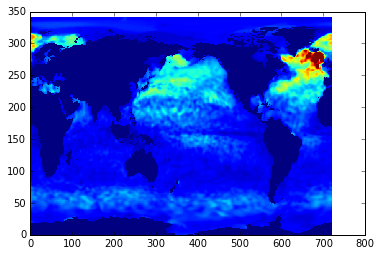

In [33]:
# import the MIMOC MLD data

files = glob.glob('../data/mimoc/MIMOC_ML_v2.2_PT_S/*.nc')

mld = np.zeros((341, 720, 12))

for m in range(12):
    mimoc = Dataset(files[m], mode='r')
    mld[:,:,m]= mimoc.variables['DEPTH_MIXED_LAYER'][:]
    lons = mimoc.variables['LONGITUDE'][:]
    lats = mimoc.variables['LATITUDE'][:]

lon, lat = np.meshgrid(lons, lats)

print np.shape(mld)
print np.shape(lon)
plt.pcolor(mld[:,:,0], vmin=0, vmax=250)

In [25]:
# make a timeseries of mean mld over the study region

# mld_kuro = np.zeros(12)
# mld_std = np.zeros(12)

y,x = np.where((lon>=140) & (lon<=170) & (lat>=35) & (lat<=45))

#### NEED TO CREATE A 2D SLICE OF THE RIGHT COORDS

mld_kuro = np.nanmean(mld[y,x,:],axis =0)
mld_std = np.nanstd(mld[y,x,:],axis =0)

# for m in range(12):
#     tmp = mld[x,y,m]
#     mld_kuro[m] = np.nanmean(tmp)
#     mld_std[m] = np.nanstd(tmp)
    
print np.shape(mld[x,y])

(1281, 12)


TypeError: Length of x must be number of columns in z.

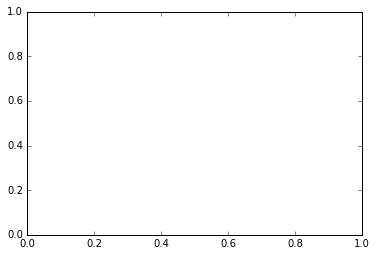

In [10]:
#plt.errorbar(np.arange(1,13,1), mld_kuro, yerr=mld_std, color='k')
# plt.plot(5, mld_kuro[4],'ro', 9, mld_kuro[8],'ro')
# plt.plot(7, mld_kuro[6],'bo')

plt.contourf(x, np.arange(1,13,1),mld_kuro)
# plt.axis([0.5, 12.5, 0, 130])
# plt.xlabel('month')
# plt.ylabel('MLD (m)')
plt.show()

In [18]:
print mld_kuro[4], mld_kuro[6],mld_kuro[8]
print mld_std[4], mld_std[6],mld_std[8]


 28.9811183956 17.1176507398 22.0673441017
6.6858792693 2.23562396033 3.31642759604


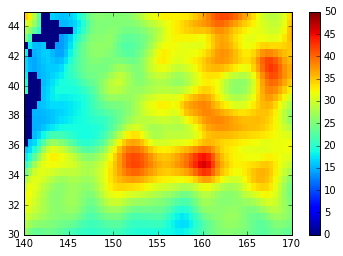

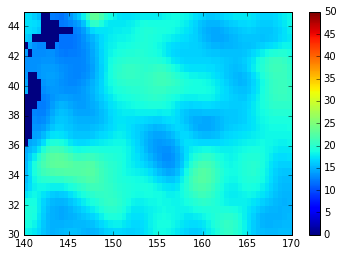

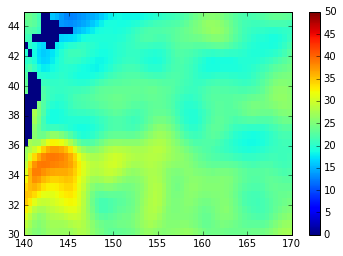

In [7]:
plt.pcolor(lon,lat,mld[:,:,4], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,6], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,8], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()